<a href="https://colab.research.google.com/github/NayanAdhikary/IPL-Cricket-Performance-Analytics/blob/main/IPL_Ball_by_ball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Load with fix
match_info = pd.read_csv('match_info_data.csv')
match_data = pd.read_csv('match_data.csv', low_memory=False)  # Quick fix

# Or dtype-specific (safer for 'season')
match_data = pd.read_csv('match_data.csv', dtype={'season': str}, low_memory=False)


###Fix warning

In [3]:
import pandas as pd
import numpy as np

#Load with fix
match_info= pd.read_csv('match_info_data.csv')
match_data = pd.read_csv('match_data.csv', low_memory=False)  #Quick fix

#or dtypes-specific (safer for 'season')
match_data = pd.read_csv('match_data.csv', dtype={'season': str}, low_memory=False)

###Merge & Clean

In [7]:
#Merge: match_data.match_id <-> match_info.id
df = pd.merge(
    match_data,
    match_info,
    left_on = 'match_id',
    right_on = 'id',
    how = 'inner'
)

#Clean numerics (handle NaNs/objects)
num_cols = ['runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes']
for col in num_cols:
  df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

#Total runs per ball
df['total_runs'] = df['runs_off_bat'] + df['extras']

print(df.head())
print(df.shape)

   match_id season_x  start_date                           venue_x  innings  \
0   1370353     2023  2023-05-29  Narendra Modi Stadium, Ahmedabad        1   
1   1370353     2023  2023-05-29  Narendra Modi Stadium, Ahmedabad        1   
2   1370353     2023  2023-05-29  Narendra Modi Stadium, Ahmedabad        1   
3   1370353     2023  2023-05-29  Narendra Modi Stadium, Ahmedabad        1   
4   1370353     2023  2023-05-29  Narendra Modi Stadium, Ahmedabad        1   

   ball    batting_team         bowling_team       striker   non_striker  ...  \
0   0.1  Gujarat Titans  Chennai Super Kings       WP Saha  Shubman Gill  ...   
1   0.2  Gujarat Titans  Chennai Super Kings       WP Saha  Shubman Gill  ...   
2   0.3  Gujarat Titans  Chennai Super Kings       WP Saha  Shubman Gill  ...   
3   0.4  Gujarat Titans  Chennai Super Kings  Shubman Gill       WP Saha  ...   
4   0.5  Gujarat Titans  Chennai Super Kings       WP Saha  Shubman Gill  ...   

  dl_applied               winner  win

In [6]:
match_data

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243812,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.5,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,335982
243813,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.6,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982
243814,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.7,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982
243815,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,15.1,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982


###Calculate over from ball

In [10]:
#Calculate over from ball (e.g., 0.1 -> 0.1)
df['over'] = df['ball'].astype(str).apply(lambda x: float(x.split('.')[0]) + float(x.split('.')[1])/10 if pd.notna(x) else 0)


#Wicket dummy (1 is dismissal)
df['wicket'] = (df['wicket_type'].notna()). astype(int)

print("Data preview:")
print(df[['match_id', 'innings', 'over', 'batting_team', 'striker', 'total_runs', 'wicket']].head(10))

Data preview:
   match_id  innings  over    batting_team       striker  total_runs  wicket
0   1370353        1   0.1  Gujarat Titans       WP Saha           0       0
1   1370353        1   0.2  Gujarat Titans       WP Saha           0       0
2   1370353        1   0.3  Gujarat Titans       WP Saha           1       0
3   1370353        1   0.4  Gujarat Titans  Shubman Gill           1       0
4   1370353        1   0.5  Gujarat Titans       WP Saha           1       0
5   1370353        1   0.6  Gujarat Titans  Shubman Gill           1       0
6   1370353        1   1.1  Gujarat Titans  Shubman Gill           0       0
7   1370353        1   1.2  Gujarat Titans  Shubman Gill           1       0
8   1370353        1   1.3  Gujarat Titans       WP Saha           1       0
9   1370353        1   1.4  Gujarat Titans  Shubman Gill           1       0


###Batsman Performance

In [11]:
#Batsman stats: runs, balls, strike rate (SR = runs/balls * 100)
batsmen_stats = df.groupby('striker').agg({
    'runs_off_bat': 'sum',
    'ball': 'count',
    'wicket': 'sum'
}).reset_index()

batsmen_stats.columns = ['striker', 'total_runs', 'balls_faced', 'dismissals']
batsmen_stats['strike_rate'] = (batsmen_stats['total_runs'] /batsmen_stats['balls_faced']) * 100
batsmen_stats['avg'] = batsmen_stats['total_runs'] / batsmen_stats['dismissals'].replace(0, np.nan)

top_batsmen = batsmen_stats.nlargest(10, 'total_runs')

print("Top Batsman:")
print(top_batsmen.round(2))

Top Batsman:
            striker  total_runs  balls_faced  dismissals  strike_rate    avg
597         V Kohli        7273         5739         205       126.73  35.48
488        S Dhawan        6617         5358         189       123.50  35.01
138       DA Warner        6399         4719         156       135.60  41.02
455       RG Sharma        6213         4890         219       127.06  28.37
519        SK Raina        5536         4177         168       132.54  32.95
27   AB de Villiers        5181         3487         125       148.58  41.45
357        MS Dhoni        5082         3865         146       131.49  34.81
116        CH Gayle        4997         3516         128       142.12  39.04
477      RV Uthappa        4954         3927         184       126.15  26.92
269      KD Karthik        4517         3492         180       129.35  25.09


### Bowlers Performance

In [14]:
#Bowlers: runs conceded, wickets, overs bowled, economy
bowler_stats = df.groupby('bowler').agg({
    'total_runs': 'sum',
    'wicket': 'sum',
    'ball': 'count'
}).reset_index()
bowler_stats.columns = ['bowler', 'runs_conceded', 'wickets', 'balls_bowled']
bowler_stats['overs'] = bowler_stats['balls_bowled'] / 6
bowler_stats['economy'] = bowler_stats['runs_conceded'] / bowler_stats['overs']
bowler_stats['avg'] = bowler_stats['runs_conceded'] / bowler_stats['wickets'].replace(0, np.nan)

top_bowlers = bowler_stats.nsmallest(10, 'economy')
print("Top 10 Bowlers (Economy):")
print(top_bowlers.round(2))

Top 10 Bowlers (Economy):
            bowler  runs_conceded  wickets  balls_bowled  overs  economy  \
23    AC Gilchrist              0        1             1   0.17     0.00   
301       NB Singh             18        1            25   4.17     4.32   
437    Sachin Baby              8        3            10   1.67     4.80   
37       AM Rahane              5        1             6   1.00     5.00   
237  LA Carseldine              6        1             7   1.17     5.14   
431      SS Mundhe              6        1             7   1.17     5.14   
120    DJ Thornely             40        3            44   7.33     5.45   
1         A Badoni             12        2            13   2.17     5.54   
109      DA Warner              2        0             2   0.33     6.00   
251       M Manhas             42        0            42   7.00     6.00   

       avg  
23    0.00  
301  18.00  
437   2.67  
37    5.00  
237   6.00  
431   6.00  
120  13.33  
1     6.00  
109    NaN  
251    

###Team Wins (needs match_info outcome column, e.g., 'winner')

In [16]:
#Check match_info columns for winner/result
print("Match info columns:", match_info.columns.tolist())

#Example: if 'winner' exists
#match_results = match_info.groupby('team1')
# ['winner'].value_counts().unstck().fillna(0)
#match_results['win_pct_team1'] = (match_results['team1'] / (match_results['team1'] + match_results['team2'])) * 100

Match info columns: ['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']


###Visualize

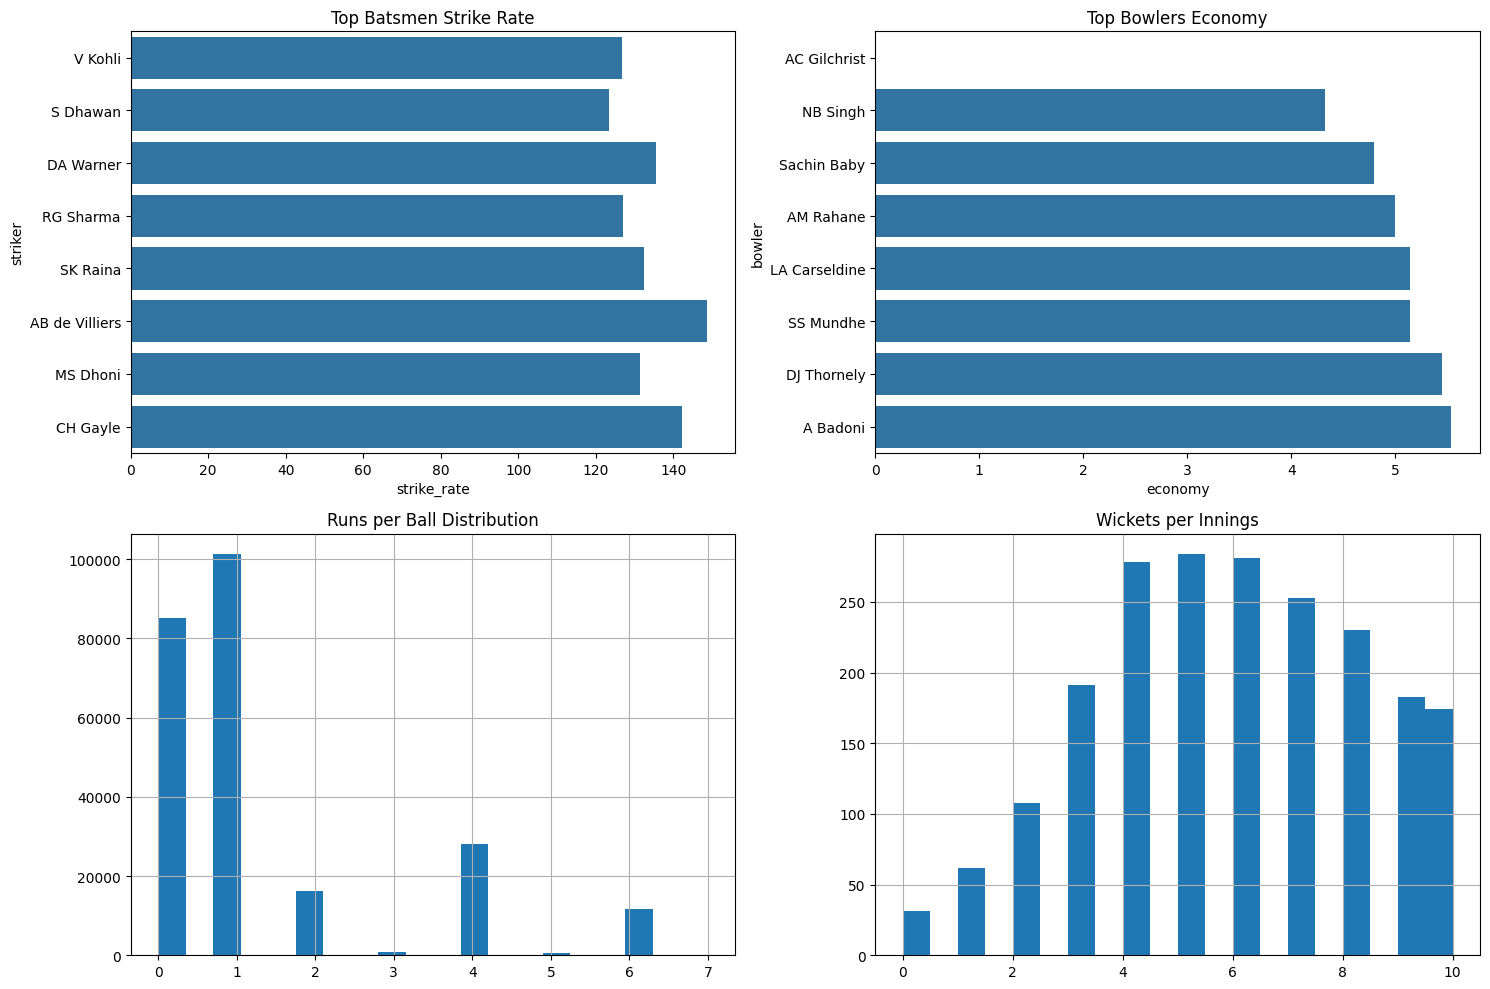

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Top batsmen SR
sns.barplot(data=top_batsmen.head(8), y='striker', x='strike_rate', ax=axes[0,0])
axes[0,0].set_title('Top Batsmen Strike Rate')

# Top bowlers economy
sns.barplot(data=top_bowlers.head(8), y='bowler', x='economy', ax=axes[0,1])
axes[0,1].set_title('Top Bowlers Economy')

# Runs distribution
df['total_runs'].hist(bins=20, ax=axes[1,0])
axes[1,0].set_title('Runs per Ball Distribution')

# Wickets per innings
df.groupby(['match_id', 'innings'])['wicket'].sum().reset_index().hist(column='wicket', bins=20, ax=axes[1,1])
axes[1,1].set_title('Wickets per Innings')

plt.tight_layout()
plt.show()
